# Long Format and Wide Format

General Rules of Thumb with Tabular Data:
- It is easier to describe functional relationships between **variables/columns** (e.g., z is a linear combination
  of x and y, density is the ratio of weight to volume) than between rows, and it is easier
  to make comparisons between groups of **observations/rows** (e.g., average of group a vs. average of
  group b) than between groups of columns.
- Depending on your use case, you might want to represent some information as individual rows of a single column (long format), or represent that same information across multiple, separate columns (wide format).
- Long Format is generally better for visualizing statistics (e.g. matplotlib seaborn), whereas Wide Format generally lends itself better for machine learning.
- You'll usually know in which format you want your data to look, so it becomes more an exercise of how to actually implement it.

##Long form is useful seaborn wide form is iseful for AMchine Learning##

In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("penguins_simple.csv",sep=";")
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


**Groupby**

In [10]:
g=df.groupby(["Sex","Species"])["Body Mass (g)"].mean()
g

Sex     Species  
FEMALE  Adelie       3368.835616
        Chinstrap    3527.205882
        Gentoo       4679.741379
MALE    Adelie       4043.493151
        Chinstrap    3938.970588
        Gentoo       5484.836066
Name: Body Mass (g), dtype: float64

**unstack ---> level(-1)  the last one group will be column ********

In [11]:
wide=g.unstack()
wide

Species,Adelie,Chinstrap,Gentoo
Sex,,,
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


In [14]:
wide=g.unstack(0)
wide

Sex,FEMALE,MALE
Species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


In [37]:
long=wide.stack()
long

Species    Sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
dtype: float64

Common patters in data science:
- ``empty list`` + ``for-loop`` + ``.append()``
- ``.groupby(['col1', 'col2', ...])``  + ``.unstack()``
- ``.set_index()`` + ``.stack()``

---

Example taken from **Tidy Data (Journal of Statistical Software)** (see course material)

In [20]:
df["Region"]=["Region_A"]*100+["Region_B"]*100+["Region_C"]*133
df.head(9)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Region
0,Adelie,39.1,18.7,181.0,3750.0,MALE,Region_A
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,Region_A
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,Region_A
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE,Region_A
4,Adelie,39.3,20.6,190.0,3650.0,MALE,Region_A
5,Adelie,38.9,17.8,181.0,3625.0,FEMALE,Region_A
6,Adelie,39.2,19.6,195.0,4675.0,MALE,Region_A
7,Adelie,41.1,17.6,182.0,3200.0,FEMALE,Region_A
8,Adelie,38.6,21.2,191.0,3800.0,MALE,Region_A


In [13]:
data = [['John Smith', np.nan, 2], ['Jane Doe', 16.0, 11.0], ['Mary Johnson', 3.0, 1.0]]
columns=['person', 'treatment_a', 'treatment_b']
untidy = pd.DataFrame(columns=columns, data=data)

In [24]:
g2=df.groupby(["Sex","Species","Region"])["Body Mass (g)"].mean()
g2

Sex     Species    Region  
FEMALE  Adelie     Region_A    3379.000000
                   Region_B    3346.739130
        Chinstrap  Region_B    3530.555556
                   Region_C    3514.285714
        Gentoo     Region_C    4679.741379
MALE    Adelie     Region_A    4076.500000
                   Region_B    3971.739130
        Chinstrap  Region_B    3955.555556
                   Region_C    3875.000000
        Gentoo     Region_C    5484.836066
Name: Body Mass (g), dtype: float64

In [31]:
wide2=g2.unstack((0,2))
wide2

Sex         FEMALE                               MALE               \
Region    Region_A     Region_B     Region_C Region_A     Region_B   
Species                                                              
Adelie      3379.0  3346.739130          NaN   4076.5  3971.739130   
Chinstrap      NaN  3530.555556  3514.285714      NaN  3955.555556   
Gentoo         NaN          NaN  4679.741379      NaN          NaN   

Sex                     
Region        Region_C  
Species                 
Adelie             NaN  
Chinstrap  3875.000000  
Gentoo     5484.836066

<AxesSubplot:xlabel='Species'>

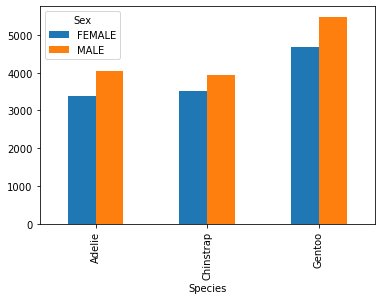

In [35]:
wide.plot.bar()

In [46]:
long2=wide2.stack().stack()
long2

Species    Region    Sex   
Adelie     Region_A  FEMALE    3379.000000
                     MALE      4076.500000
           Region_B  FEMALE    3346.739130
                     MALE      3971.739130
Chinstrap  Region_B  FEMALE    3530.555556
                     MALE      3955.555556
           Region_C  FEMALE    3514.285714
                     MALE      3875.000000
Gentoo     Region_C  FEMALE    4679.741379
                     MALE      5484.836066
dtype: float64

In [45]:
long=wide.stack()
long

Species    Sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
dtype: float64

In [47]:
wide

Sex,FEMALE,MALE
Species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


In summary, we have 2 configurations of tables:
- Long Format:
    - to get a table into long format, use:
        - ``stack`` or ``melt``
    - In general, lends itself better for plotting statistics
- Wide Format:
    - to get a table into wide format, use:
        - ``unstack`` or ``pivot``
    - In general, lends itself better for machine learning
    
Also:

"Tidy data is particularly well suited for programming languages like R and Python, because the layout **ensures that values of different variables from the same observation are always paired.**" -Hadley Wickham, *Tidy Data*

---

More practical example of "untidy" data in a very wide format:
- Your job is to melt this data into a longer format so that it's easier to work with and merge with other tables in the Animated Scatterplot Exercise in the course material. https://krspiced.pythonanywhere.com/chapters/project_gapminder/long_vs_wide.html#animated-scatterplot-exercise

In [48]:
pd.read_excel('/Users/pawlodkowski/Downloads/gapminder_population.xlsx').head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/pawlodkowski/Downloads/gapminder_population.xlsx'

In [50]:
untidy.set_index("person").stack(dropna=False).reset_index()

NameError: name 'untidy' is not defined